In [8]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 读取数据 并展示

In [9]:
data_col = ['user_id','item_id','rating','timestamp']
 
item_col = ['movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown','Action',
           'Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy',
           'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
 
#总数据包含了用户，物品，评分
data_dir = 'u.data' 
data = pd.read_table(data_dir,header=None, names=data_col, parse_dates=['timestamp'])
 
#物品详细数据
item_dir = 'u.item'
item = pd.read_table(item_dir, header=None, names=item_col, parse_dates=['release_date','video_release_date'], encoding='ISO-8859-1', sep='|')

In [10]:
item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 加载数据
#### 将id标准化：新id从0开始按1递增，输出格式：(user, item, rating)

In [12]:
N, M, data_list, item_ids_dict = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


In [13]:
new_item_information = item.insert(0,'new_id',[item_ids_dict[old_idx] for old_idx in item['movie_id']])
item.sort_values('new_id',inplace=False).set_index(['new_id']).reset_index().head()

,new_id,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,242,Kolya (1996),1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,302,L.A. Confidential (1997),1997-01-01,NaT,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2,377,Heavyweights (1994),1994-01-01,NaT,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,51,Legends of the Fall (1994),1994-01-01,NaT,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,4,346,Jackie Brown (1997),1997-01-01,NaT,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 分割数据集

In [14]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 转化数据成矩阵格式

In [15]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)
train_mat[0,:100]

array([3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 计算相似度

In [16]:
# 计算 a 和 b 之间相似度
def calculate_similarity(a, b, model='pearson', minimum_common_items=5):
    assert a.shape==b.shape
    dim = len(a.shape) #向量维度
    common_items = a*b>0 # 共同评分的项
    common_size = np.sum(common_items,axis=dim-1)
    
    if model=='pearson':
        mean_a = np.sum(a,axis=dim-1)/np.sum(a>0,axis=dim-1)
        mean_b = np.sum(b,axis=dim-1)/np.sum(b>0,axis=dim-1)
        if dim ==1: #若是两个列向量
            aa = (a - mean_a)*common_items
            bb = (b - mean_b)*common_items
        else:
            aa = (a - np.reshape(mean_a, (-1,1)))*common_items
            bb = (b - np.reshape(mean_b, (-1,1)))*common_items
    else: #consine
        mean_u = np.sum(b,axis=0)/np.sum(b>0,axis=0)
        aa = (a - mean_u)*common_items
        bb = (b - mean_u)*common_items
        
    sim = np.sum(aa*bb, axis=dim-1)/(np.sqrt(np.sum(aa**2, axis=dim-1))*np.sqrt(np.sum(bb**2, axis=dim-1)) + 1e-10)
    least_common_items = common_size>minimum_common_items # 共同评分的商品不少于least_common_items
    return sim*least_common_items


# 计算相似度
def similarity_matrix(mat, model='pearson', minimum_common_items=5):
    n,m = mat.shape
    sim_list=[]
    for u in range(n):
        a = np.tile(mat[u,:], (n,1))
        b = mat
        if model=='pearson':
            sim = calculate_similarity(a, b, model='pearson', minimum_common_items=minimum_common_items)
        else: # consine
            sim = calculate_similarity(a, b, model='consine', minimum_common_items=minimum_common_items)
        sim_list.append(sim)
        if u % 100 ==0:
            print(u)
    return np.array(sim_list) 

In [17]:
sim_mat = similarity_matrix(mat=train_mat, model='pearson')
neighbors = np.argsort(-np.array(sim_mat)) # 获取近邻
sim_sort = -1*np.sort(-np.array(sim_mat)) # 获取对应近邻的相似度

0
100
200
300
400
500
600
700
800
900


In [18]:
np.set_printoptions(precision=4, suppress=True)
print('user 0:')
print('neighbors:') # 用户0的近邻
print(neighbors[0,:10])
print('sim:\n') # 用户0 的近邻相似度
print(sim_sort[0,:10])
print('similarity_mat:') # 用户之间的相似度矩阵
print(sim_mat[:6,:6])

user 0:
neighbors:
[  0 660 542  72 406 353 742 620  38  20]
sim:

[1.     0.8529 0.8121 0.7824 0.7477 0.7193 0.7086 0.7054 0.6941 0.6636]
similarity_mat:
[[ 1.     -0.      0.461   0.3535 -0.      0.    ]
 [-0.      1.      0.1294 -0.2412  0.     -0.2432]
 [ 0.461   0.1294  1.     -0.0026  0.      0.2303]
 [ 0.3535 -0.2412 -0.0026  1.      0.      0.1441]
 [-0.      0.      0.      0.      1.      0.    ]
 [ 0.     -0.2432  0.2303  0.1441  0.      1.    ]]


### 近邻Ｋ的取值
经验取值：一般取 10-50 

In [19]:
def get_K(sim_mat, min_similarity=0.5):
    num = np.sum(sim_mat[:,1:]>min_similarity, axis=1) #统计用户大于min_similarity的评分数
    
    # 画图 
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.hist(num, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel(u"人数/商品数")
    plt.ylabel(u"次数")
    plt.title(u"人数/商品数-次数分布直方图")
    plt.show()
    
    num_sort = np.sort(-num)
    line = int(0.8*len(sim_mat))
    K = -1*num_sort[line]
    return K

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dis

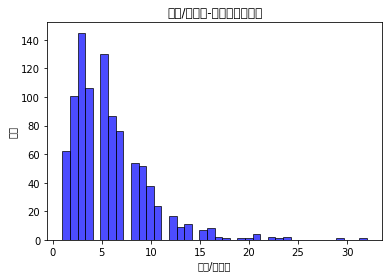

min_similarity: 0.8 K: 3


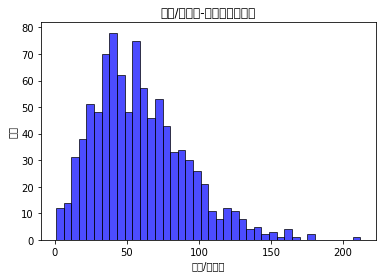

min_similarity: 0.5 K: 32


In [20]:
min_similarity=0.8
K = get_K(sim_mat, min_similarity=min_similarity)
print('min_similarity:',min_similarity,'K:',K)

min_similarity=0.5
K = get_K(sim_mat, min_similarity=min_similarity)
print('min_similarity:',min_similarity,'K:',K)

### 预测用户未知项的评分

In [21]:
def prediction(train_mat, sim_mat, K=1, model='user_based'):
    assert len(train_mat.shape)>1
    n,m = train_mat.shape
    
    if  model=='user_based':
        sim_sort = -1*np.sort(-np.array(sim_mat))[:,1:K+1] # 除去最相似的自己
        neighbors = np.argsort(-np.array(sim_mat))[:,1:K+1]
        common_items = train_mat[neighbors]>0 
        mean_user = np.reshape(np.sum(train_mat,axis=1)/np.sum(train_mat>0,axis=1), (-1,1))
        mat_m = train_mat - mean_user
        aa = np.sum(sim_sort[:,:,np.newaxis]*mat_m[neighbors]*common_items,axis=1)
        bb = np.sum(sim_sort[:,:,np.newaxis]*common_items,axis=1)+1e-10 # 1e-10保证分母不为０
        r_pred = mean_user + aa/bb
        return r_pred
    else: # 'item_based'
        r_pred=[]
        for u in range(n):
            u_mat = np.tile(train_mat[u],(m,1)) # m份用户u的记录,m*m
            rated_items_sim = (u_mat>0)*sim_mat # 保留有评分记录的相似度 m*m
            sim_sort = -1*np.sort(-np.array(rated_items_sim))[:,:K] # m*K
            neighbors = np.argsort(-np.array(rated_items_sim))[:,:K] # m*K
            neighbor_ratings = np.array([u_mat[i,neighbors[i]] for i in range(m)])# m*K
            aa = np.sum(sim_sort*neighbor_ratings,axis=1) # m*1
            bb = np.sum(sim_sort,axis=1)+1e-10 # 1e-10保证分母不为０ m*1
            r_pred.append(aa/bb)
        
        return np.array(r_pred)    

In [22]:
r_pred = prediction(train_mat=train_mat, sim_mat=sim_mat, K=K, model='user_based')

### 根据预测值　对商品进行排序　获取top-n列表

In [23]:
n = 10
topn = get_topn(r_pred=r_pred, train_mat=train_mat, n=n)
print('user 0:')
print('top-n list:',topn[0])

user 0:
top-n list: [ 640 1133  785  533  760  667  753  750 1241  396]


### 评估模型
$$
 MAE = \frac{1}{\left | R_{test} \right |} \sum_{\left ( u,i \right ) \in R_{test} }^{ } \left | r_{u,i}-\widehat{r}_{u,i} \right |
$$
$$
RMSE = \sqrt{\frac{1}{\left | R_{test} \right |} \sum_{\left ( u,i \right ) \in R_{test} }^{ } \left (r_{u,i}-\widehat{r}_{u,i} \right )^2 }
$$
$$
Recall = \frac{hits}{\left |R_{test} \right |}
$$
$$
Precision = \frac{hits}{\left |top\_n \right |}
$$

In [24]:
mae, rmse = mae_rmse(r_pred=r_pred, test_mat=test_mat)
print('mae:%.4f; rmse:%.4f'%(mae,rmse))
recall, precision = recall_precision(topn=topn, test_mat=test_mat)
print('recall:%.4f; precision:%.4f'%(recall,precision))

mae:0.8458; rmse:1.0836
recall:0.0103; precision:0.0218


# 基于商品的近邻算法
用户－商品的评分矩阵　$ R^{n×m} $　转置
－>商品－用户的评分矩阵　$ R^{m×n} $

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2742

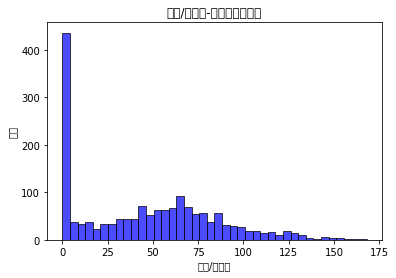

min_similarity: 0.5 K: 1


In [25]:
#计算相似度
sim_mat = similarity_matrix(mat=train_mat.T, model='consine', minimum_common_items=3)# 矩阵转置
neighbors = np.argsort(-np.array(sim_mat)) # 获取近邻
sim_sort = -1*np.sort(-np.array(sim_mat)) # 获取对应近邻的相似度

# 获取近邻数K
min_similarity = 0.5
K = get_K(sim_mat, min_similarity=min_similarity)
print('min_similarity:',min_similarity,'K:',K)

In [26]:
# 预测评分矩阵
r_pred = prediction(train_mat=train_mat, sim_mat=sim_mat, K=5, model='item_based')

# 获取推荐列表
n = 10
topn = get_topn(r_pred=r_pred, train_mat=train_mat, n=n)

# 评估算法
mae, rmse = mae_rmse(r_pred=r_pred, test_mat=test_mat)
print('mae:%.4f; rmse:%.4f'%(mae,rmse))
recall, precision = recall_precision(topn=topn, test_mat=test_mat)
print('recall:%.4f; precision:%.4f'%(recall,precision))

mae:0.8308; rmse:1.0802
recall:0.0094; precision:0.0199
